In [4]:
import numpy
import PIL
from PIL import Image
from PIL import ImageFilter
import os
import glob
import cv2
from matplotlib import pyplot as plt

In [10]:
image_list = []
#path = "/home/pat/Documents/thesis stuff/locked in dataset back of hand 1/"
#longer_path = "/home/pat/Documents/thesis stuff/locked in dataset back of hand 1/"
#path = "/home/pat/Documents/thesis stuff/locked in dataset back of hand 1/"
#longer_path = "/home/pat/Documents/thesis stuff/locked in dataset back of hand 1/"
#path = "D:/thesis_stuff/locked_in_dataset"
#longer_path = "D:\thesis_stuff\locked_in_dataset"

path = "D:/thesis_stuff/infraredledtest"
longer_path = "D:/thesis_stuff/locked_in_dataset"


os.chdir(path)
files = glob.glob('*.txt')

#for filename in sorted(glob.glob(path+'\*.jpg')):

for filename in sorted(glob.glob('*.jpg')):
    im = PIL.Image.open(filename).convert("L")
    imarr = numpy.array(im).astype(numpy.int16)
    print(filename)
    image_list.append(imarr)

mpv-shot0005.jpg
mpv-shot0006.jpg
mpv-shot0007.jpg
mpv-shot0008.jpg
mpv-shot0009.jpg
mpv-shot0010.jpg
mpv-shot0011.jpg
mpv-shot0012.jpg
mpv-shot0013.jpg
mpv-shot0014.jpg
mpv-shot0015.jpg
mpv-shot0016.jpg
mpv-shot0017.jpg
mpv-shot0018.jpg
mpv-shot0019.jpg
mpv-shot0020.jpg
mpv-shot0021.jpg
mpv-shot0022.jpg
mpv-shot0023.jpg
mpv-shot0024.jpg
mpv-shot0025.jpg
mpv-shot0026.jpg
mpv-shot0027.jpg
mpv-shot0028.jpg
mpv-shot0029.jpg
mpv-shot0030.jpg
mpv-shot0031.jpg
mpv-shot0032.jpg
mpv-shot0033.jpg
mpv-shot0034.jpg
mpv-shot0035.jpg
mpv-shot0036.jpg
mpv-shot0037.jpg
mpv-shot0038.jpg
mpv-shot0039.jpg
mpv-shot0040.jpg
mpv-shot0041.jpg
mpv-shot0042.jpg
mpv-shot0043.jpg
mpv-shot0044.jpg
mpv-shot0045.jpg
mpv-shot0046.jpg
mpv-shot0047.jpg
mpv-shot0048.jpg
mpv-shot0049.jpg
mpv-shot0050.jpg
mpv-shot0051.jpg
mpv-shot0052.jpg
mpv-shot0053.jpg
mpv-shot0054.jpg
mpv-shot0055.jpg
mpv-shot0056.jpg
mpv-shot0057.jpg
mpv-shot0058.jpg
mpv-shot0059.jpg
mpv-shot0060.jpg
mpv-shot0061.jpg
mpv-shot0062.jpg
mpv-shot0063.j

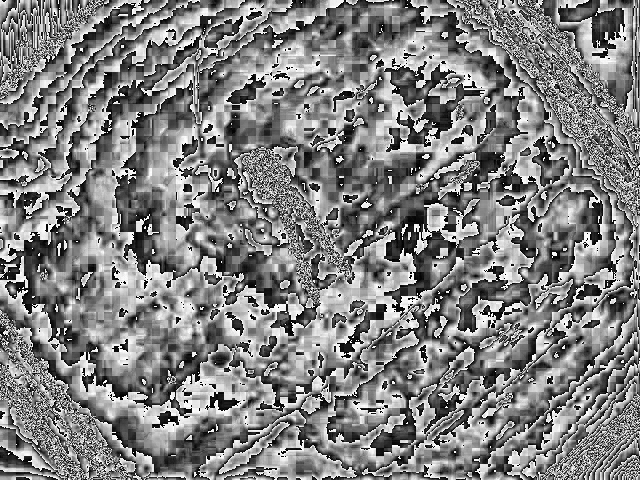

In [12]:
subtraction_pairs_list = []

i = 0

for i in range(150):
    imgarr880 = image_list[2*i]
    imgarrred = image_list[2*i+1]
    #imgarr880=(imgarrred[0,0]/imgarr880[0,0])*imgarr880
    imgarr880=(numpy.sum(imgarrred)/numpy.sum(imgarr880))*imgarr880
    subtraction=imgarrred-imgarr880
    #subtraction_pairs_list.append(subtraction[240:,320:])
    subtraction_pairs_list.append(subtraction)

additions = numpy.zeros((480,640))
    
for i in range(150):
    additions = additions + subtraction_pairs_list[i]
    
additionsrescaled = numpy.interp(additions, (additions.min(), additions.max()), (0, 255))
additionsrescaled2 = additions/100
additions,additionsrescaled,additionsrescaled2

Image.fromarray(additions.astype('uint8'), 'L')

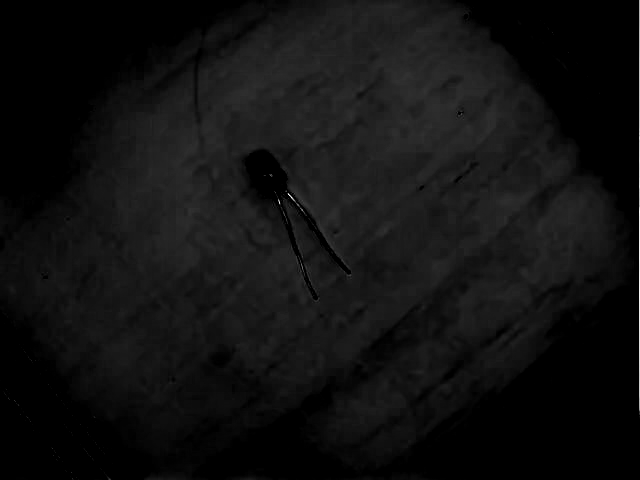

In [14]:
additionpos = additions.clip(min=0)
additionneg = (-additions).clip(min=0)

additionsposrescaled = numpy.interp(additionpos, (additionpos.min(), additionpos.max()), (0, 255))
additionsnegrescaled = numpy.interp(additionneg, (additionneg.min(), additionneg.max()), (0, 255))

finalimgpos = Image.fromarray(additionsposrescaled.astype('uint8'), 'L')
finalimgneg = Image.fromarray(additionsnegrescaled.astype('uint8'), 'L')

finalimgpos

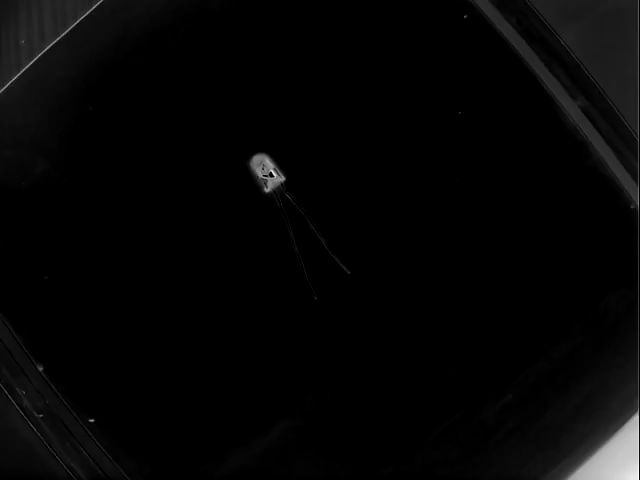

In [15]:
finalimgneg

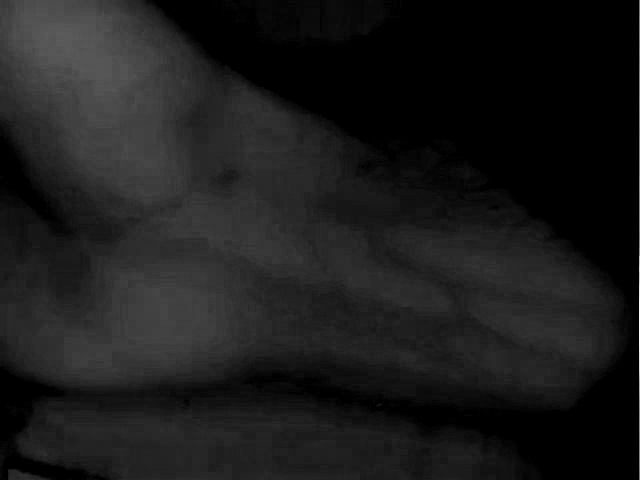

In [37]:
additionpos = subtraction_pairs_list[4].clip(min=0)
additionneg = (-subtraction_pairs_list[4]).clip(min=0)

additionsposrescaled = numpy.interp(additionpos, (additionpos.min(), additionpos.max()), (0, 255))
additionsnegrescaled = numpy.interp(additionneg, (additionneg.min(), additionneg.max()), (0, 255))

finalimgpos = Image.fromarray(additionsposrescaled.astype('uint8'), 'L')
finalimgneg = Image.fromarray(additionsnegrescaled.astype('uint8'), 'L')

finalimgpos

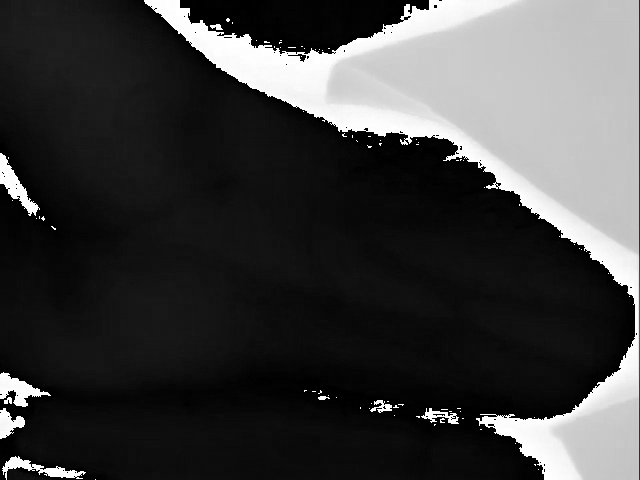

In [44]:
Image.fromarray(subtraction_pairs_list[70].astype('uint8'), 'L')

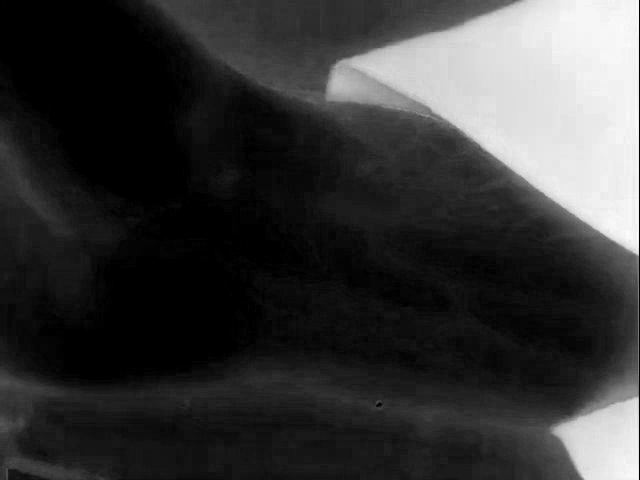

In [30]:
additionnegclip = additionneg.clip(max=2000)
additionnegcliprescaled = numpy.interp(additionnegclip, (additionnegclip.min(), additionnegclip.max()), (0, 255))
finalimgnegcliprescaled = Image.fromarray(additionnegcliprescaled.astype('uint8'), 'L')
finalimgnegcliprescaled

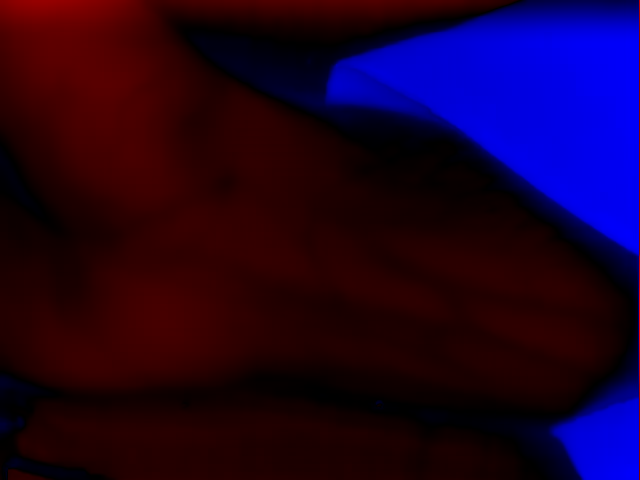

In [45]:
rgbArray = numpy.zeros((480,640,3), 'uint8')
rgbArray[..., 0] = additionsposrescaled
rgbArray[..., 1] = 0
rgbArray[..., 2] = additionsnegrescaled
img = Image.fromarray(rgbArray)
img

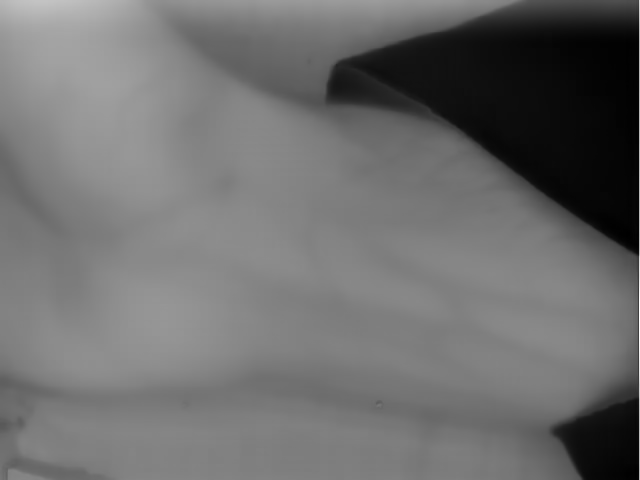

In [40]:
finalimg = Image.fromarray(additionsrescaled.astype('uint8'), 'L')
finalimg

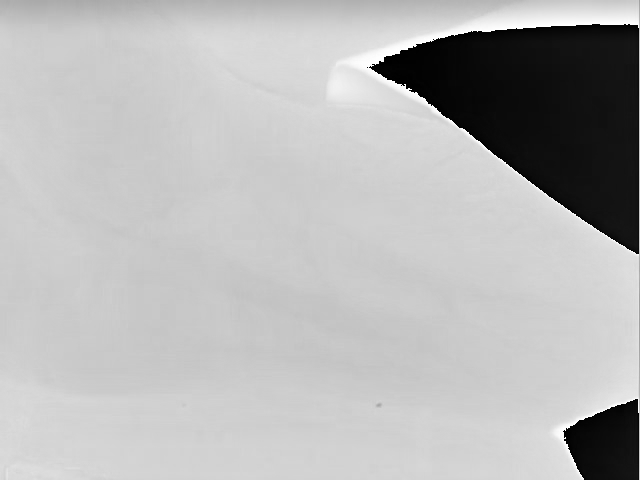

In [46]:
img=image_list[103]
background = finalimg
subtraction = img-background
Image.fromarray(subtraction.astype('uint8'), 'L')

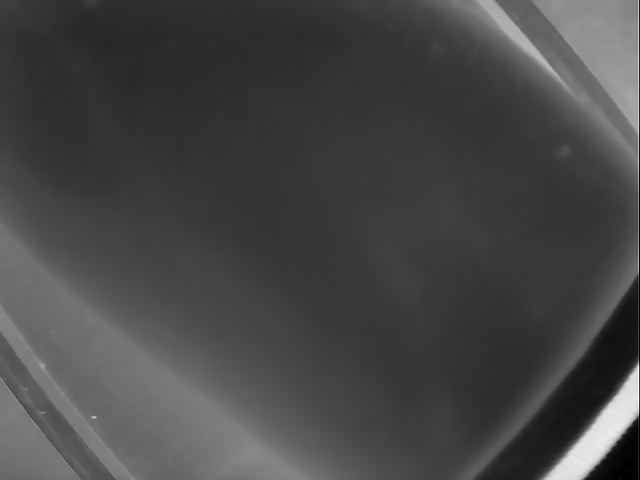

In [181]:
subtraction_pairs_list = []

i = 100

for i in range(180):
    imgarr880 = image_list[2*i]
    imgarrred = image_list[2*i+1]
    imgarr880=(imgarrred[0,0]/imgarr880[0,0])*imgarr880
    #imgarr880=(numpy.sum(imgarrred)/numpy.sum(imgarr880))*imgarr880
    subtraction = background-imgarrred-imgarr880
    subtraction = subtraction + background
    #subtraction_pairs_list.append(subtraction[240:,320:])
    subtraction_pairs_list.append(subtraction)

additions = numpy.zeros((480,640))

for i in range(180):
    additions = additions + subtraction_pairs_list[i]

additionsrescaled = numpy.interp(additions, (additions.min(), additions.max()), (0, 255))
additionsrescaled2 = additions/100
additions,additionsrescaled,additionsrescaled2

additions = additions + 50000

additionpos = additions.clip(min=0)
additionneg = (-additions).clip(min=0)
additionsposrescaled = numpy.interp(additionpos, (additionpos.min(), additionpos.max()), (0, 255))
additionsnegrescaled = numpy.interp(additionneg, (additionneg.min(), additionneg.max()), (0, 255))

Image.fromarray(additionsposrescaled.astype('uint8'), 'L')